# PRICING - AMADEUS API scrape for pricing 
### Cristian Villada |  Pricing & Commercial Strategy
    
***
<div class="alert alert-block alert-info" >
    
### Description:
This Notebook shows  <a href="https://www.taag.com/en/"> TAAG </a>  Network Pricing Analytics 
</div>

***

In [1]:
# !pip install amadeus
# !pip install pandasql
from pandasql import sqldf
import pandas as pd

### Import amadeus libraries, insert the keys

In [2]:
from amadeus import Client, ResponseError
import pandas as pd

# Initialize your Amadeus client with your API credentials
amadeus = Client(
    client_id='pNYUh6kEI8K4JbqkXl79xCZcI2IMbs37',
    client_secret='v8hJNTTa1DfLvXG7'
)



### Insert the request

In [6]:
#This code gives you the price metrics for one selected route over an specific departure date
#Only use as informative from the first quartile range 


price_metrics_data = []
departure_dates = ['2023-12-12', '2023-12-13', '2023-12-14']
for dep in departure_dates:
    try:
        '''
        Returns price metrics of a given itinerary
        '''

        
        response = amadeus.analytics.itinerary_price_metrics.get(originIataCode='LIS',
                                                                 destinationIataCode='LAD',
                                                                 departureDate=dep)
        
        
#         print(response.data)
        
        price_metrics_data.append(response.data)
#         print(price_metrics_data)
    except ResponseError as error:
        raise error

### Convert the JSON output into a PD dataframe

In [7]:
#Only one departure date

rows = []
for item in response.data:
    for price_metric in item['priceMetrics']:
        row = {
            'Origin': item['origin']['iataCode'],
            'Destination': item['destination']['iataCode'],
            'DepartureDate': item['departureDate'],
            'TransportType': item['transportType'],
            'CurrencyCode': item['currencyCode'],
            'OneWay': item['oneWay'],
            'PriceAmount': float(price_metric['amount']),
            'QuartileRanking': price_metric['quartileRanking']
        }
        rows.append(row)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

# Display the DataFrame
df

,Origin,Destination,DepartureDate,TransportType,CurrencyCode,OneWay,PriceAmount,QuartileRanking
0,LIS,LAD,2023-12-14,FLIGHT,EUR,False,52.33,MINIMUM
1,LIS,LAD,2023-12-14,FLIGHT,EUR,False,552.74,FIRST
2,LIS,LAD,2023-12-14,FLIGHT,EUR,False,794.05,MEDIUM
3,LIS,LAD,2023-12-14,FLIGHT,EUR,False,843.33,THIRD
4,LIS,LAD,2023-12-14,FLIGHT,EUR,False,1177.93,MAXIMUM


In [8]:
#all the departure dates

rows = []
for item_list in price_metrics_data:
    for item in item_list:
        for price_metric in item['priceMetrics']:
            row = {
                'Origin': item['origin']['iataCode'],
                'Destination': item['destination']['iataCode'],
                'DepartureDate': item['departureDate'],
                'TransportType': item['transportType'],
                'CurrencyCode': item['currencyCode'],
                'OneWay': item['oneWay'],
                'PriceAmount': float(price_metric['amount']),
                'QuartileRanking': price_metric['quartileRanking']
            }
            rows.append(row)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

# Display the DataFrame
df



,Origin,Destination,DepartureDate,TransportType,CurrencyCode,OneWay,PriceAmount,QuartileRanking
0,LIS,LAD,2023-12-12,FLIGHT,EUR,False,51.05,MINIMUM
1,LIS,LAD,2023-12-12,FLIGHT,EUR,False,552.30,FIRST
2,LIS,LAD,2023-12-12,FLIGHT,EUR,False,794.55,MEDIUM
3,LIS,LAD,2023-12-12,FLIGHT,EUR,False,842.40,THIRD
4,LIS,LAD,2023-12-12,FLIGHT,EUR,False,1178.19,MAXIMUM
5,LIS,LAD,2023-12-13,FLIGHT,EUR,False,52.33,MINIMUM
6,LIS,LAD,2023-12-13,FLIGHT,EUR,False,552.30,FIRST
7,LIS,LAD,2023-12-13,FLIGHT,EUR,False,792.90,MEDIUM
8,LIS,LAD,2023-12-13,FLIGHT,EUR,False,842.40,THIRD
9,LIS,LAD,2023-12-13,FLIGHT,EUR,False,1177.93,MAXIMUM


### Other libraries

In [12]:
# Here, lets look for a flight in an specific departure date to look the minimum available prices


departure_dates = ['2023-12-12', '2023-12-13', '2023-12-14']

# List to store flight price data
price_flights_data = []

# Loop through each departure date
for dep in departure_dates:
    try:
        # Get price metrics for a given itinerary
        response = amadeus.shopping.flight_offers_search.get(
            originLocationCode='LAD',
            destinationLocationCode='LIS',
            departureDate=dep,
            adults='1'
        )
        
        # Print response data for debugging (you can remove this if not needed)
        print(response.data)
        
        # Append the response data to the price_flights_data list
        price_flights_data.append(response.data)
        
    except Exception as e:
        # Handle exceptions if any
        print(f"An error occurred for departure date {dep}: {e}")











[{'type': 'flight-offer', 'id': '1', 'source': 'GDS', 'instantTicketingRequired': False, 'nonHomogeneous': False, 'oneWay': False, 'lastTicketingDate': '2023-09-23', 'lastTicketingDateTime': '2023-09-23', 'numberOfBookableSeats': 9, 'itineraries': [{'duration': 'PT7H50M', 'segments': [{'departure': {'iataCode': 'LAD', 'at': '2023-12-12T12:40:00'}, 'arrival': {'iataCode': 'LIS', 'terminal': '1', 'at': '2023-12-12T19:30:00'}, 'carrierCode': 'DT', 'number': '652', 'aircraft': {'code': '330'}, 'operating': {'carrierCode': 'DT'}, 'duration': 'PT7H50M', 'id': '208', 'numberOfStops': 0, 'blacklistedInEU': False}]}], 'price': {'currency': 'EUR', 'total': '471.92', 'base': '295.00', 'fees': [{'amount': '0.00', 'type': 'SUPPLIER'}, {'amount': '0.00', 'type': 'TICKETING'}], 'grandTotal': '471.92'}, 'pricingOptions': {'fareType': ['PUBLISHED'], 'includedCheckedBagsOnly': True}, 'validatingAirlineCodes': ['DT'], 'travelerPricings': [{'travelerId': '1', 'fareOption': 'STANDARD', 'travelerType': 'ADU

[{'type': 'flight-offer', 'id': '1', 'source': 'GDS', 'instantTicketingRequired': False, 'nonHomogeneous': False, 'oneWay': False, 'lastTicketingDate': '2023-09-23', 'lastTicketingDateTime': '2023-09-23', 'numberOfBookableSeats': 9, 'itineraries': [{'duration': 'PT7H50M', 'segments': [{'departure': {'iataCode': 'LAD', 'at': '2023-12-13T12:40:00'}, 'arrival': {'iataCode': 'LIS', 'terminal': '1', 'at': '2023-12-13T19:30:00'}, 'carrierCode': 'DT', 'number': '652', 'aircraft': {'code': '330'}, 'operating': {'carrierCode': 'DT'}, 'duration': 'PT7H50M', 'id': '183', 'numberOfStops': 0, 'blacklistedInEU': False}]}], 'price': {'currency': 'EUR', 'total': '471.92', 'base': '295.00', 'fees': [{'amount': '0.00', 'type': 'SUPPLIER'}, {'amount': '0.00', 'type': 'TICKETING'}], 'grandTotal': '471.92'}, 'pricingOptions': {'fareType': ['PUBLISHED'], 'includedCheckedBagsOnly': True}, 'validatingAirlineCodes': ['DT'], 'travelerPricings': [{'travelerId': '1', 'fareOption': 'STANDARD', 'travelerType': 'ADU

[{'type': 'flight-offer', 'id': '1', 'source': 'GDS', 'instantTicketingRequired': False, 'nonHomogeneous': False, 'oneWay': False, 'lastTicketingDate': '2023-09-23', 'lastTicketingDateTime': '2023-09-23', 'numberOfBookableSeats': 9, 'itineraries': [{'duration': 'PT7H50M', 'segments': [{'departure': {'iataCode': 'LAD', 'at': '2023-12-14T12:40:00'}, 'arrival': {'iataCode': 'LIS', 'terminal': '1', 'at': '2023-12-14T19:30:00'}, 'carrierCode': 'DT', 'number': '652', 'aircraft': {'code': '330'}, 'operating': {'carrierCode': 'DT'}, 'duration': 'PT7H50M', 'id': '194', 'numberOfStops': 0, 'blacklistedInEU': False}]}], 'price': {'currency': 'EUR', 'total': '471.92', 'base': '295.00', 'fees': [{'amount': '0.00', 'type': 'SUPPLIER'}, {'amount': '0.00', 'type': 'TICKETING'}], 'grandTotal': '471.92'}, 'pricingOptions': {'fareType': ['PUBLISHED'], 'includedCheckedBagsOnly': True}, 'validatingAirlineCodes': ['DT'], 'travelerPricings': [{'travelerId': '1', 'fareOption': 'STANDARD', 'travelerType': 'ADU

In [13]:
# Flatten the nested JSON structure
flat_data = []
for item in response.data:
    
    flat_item = {
        'Type': item['type'],
        'ID': item['id'],
        'Source': item['source'],
        'InstantTicketingRequired': item['instantTicketingRequired'],
        'NonHomogeneous': item['nonHomogeneous'],
        'OneWay': item['oneWay'],
        'LastTicketingDate': item['lastTicketingDate'],
        'LastTicketingDateTime': item['lastTicketingDateTime'],
        'NumberOfBookableSeats': item['numberOfBookableSeats'],
        'Duration': item['itineraries'][0]['duration'],
        'DepartureIATACode': item['itineraries'][0]['segments'][0]['departure']['iataCode'],
        'DepartureDateTime': item['itineraries'][0]['segments'][0]['departure']['at'],
        'ArrivalIATACode': item['itineraries'][0]['segments'][0]['arrival']['iataCode'],
        'ArrivalTerminal': item['itineraries'][0]['segments'][0]['arrival']['iataCode'],
        'ArrivalDateTime': item['itineraries'][0]['segments'][0]['arrival']['at'],
        'CarrierCode': item['itineraries'][0]['segments'][0]['carrierCode'],
        'FlightNumber': item['itineraries'][0]['segments'][0]['number'],
        'AircraftCode': item['itineraries'][0]['segments'][0]['aircraft']['code'],
#         'OperatingCarrierCode': item['itineraries'][0]['segments'][0]['operating']['carrierCode'],
        'SegmentDuration': item['itineraries'][0]['segments'][0]['duration'],
        'SegmentID': item['itineraries'][0]['segments'][0]['id'],
        'NumberOfStops': item['itineraries'][0]['segments'][0]['numberOfStops'],
        'BlacklistedInEU': item['itineraries'][0]['segments'][0]['blacklistedInEU'],
        'Currency': item['price']['currency'],
        'TotalPrice': item['price']['total'],
        'BasePrice': item['price']['base'],
        'SupplierFee': item['price']['fees'][0]['amount'],
        'TicketingFee': item['price']['fees'][1]['amount'],
        'GrandTotal': item['price']['grandTotal'],
        'FareType': item['pricingOptions']['fareType'][0],
        'IncludedCheckedBagsOnly': item['pricingOptions']['includedCheckedBagsOnly'],
        'ValidatingAirlineCode': item['validatingAirlineCodes'][0],
        'TravelerID': item['travelerPricings'][0]['travelerId'],
        'FareOption': item['travelerPricings'][0]['fareOption'],
        'TravelerType': item['travelerPricings'][0]['travelerType'],
        'TravelerPriceCurrency': item['travelerPricings'][0]['price']['currency'],
        'TravelerTotalPrice': item['travelerPricings'][0]['price']['total'],
        'TravelerBasePrice': item['travelerPricings'][0]['price']['base'],
        'SegmentCabin': item['travelerPricings'][0]['fareDetailsBySegment'][0]['cabin'],
        'SegmentFareBasis': item['travelerPricings'][0]['fareDetailsBySegment'][0]['fareBasis'],
#         'SegmentBrandedFare': item['travelerPricings'][0]['fareDetailsBySegment'][0]['brandedFare'],
        'SegmentClass': item['travelerPricings'][0]['fareDetailsBySegment'][0]['class'],
        'IncludedCheckedBags': item['travelerPricings'][0]['fareDetailsBySegment'][0]['includedCheckedBags']['quantity']
    }
    flat_data.append(flat_item)
    
    

# segment_data = traveler_data['fareDetailsBySegment'][0]
# main_data.update({
#     'segmentId': segment_data['segmentId'],
#     'cabin': segment_data['cabin'],
#     'fareBasis': segment_data['fareBasis'],
#     'brandedFare': segment_data['brandedFare'],
#     'class': segment_data['class'],
#     'includedCheckedBags_quantity': segment_data['includedCheckedBags']['quantity']    
    
    

# Convert the flattened data into a Pandas DataFrame
df = pd.DataFrame(flat_data)

# Display the DataFrame
df.head(20)

,Type,ID,Source,InstantTicketingRequired,NonHomogeneous,OneWay,LastTicketingDate,LastTicketingDateTime,NumberOfBookableSeats,Duration,...,TravelerID,FareOption,TravelerType,TravelerPriceCurrency,TravelerTotalPrice,TravelerBasePrice,SegmentCabin,SegmentFareBasis,SegmentClass,IncludedCheckedBags
0,flight-offer,1,GDS,False,False,False,2023-09-23,2023-09-23,9,PT7H50M,...,1,STANDARD,ADULT,EUR,471.92,295.00,ECONOMY,XL3AAOBA,X,2
1,flight-offer,2,GDS,False,False,False,2023-09-23,2023-09-23,9,PT17H35M,...,1,STANDARD,ADULT,EUR,495.12,295.00,ECONOMY,XL3AAOBA,X,2
2,flight-offer,3,GDS,False,False,False,2023-09-23,2023-09-23,9,PT8H40M,...,1,STANDARD,ADULT,EUR,496.92,320.00,ECONOMY,XL3AAOBA,X,2
3,flight-offer,4,GDS,False,False,False,2023-09-23,2023-09-23,9,PT19H,...,1,STANDARD,ADULT,EUR,549.47,361.00,ECONOMY,XL3AAOBA,X,2
4,flight-offer,5,GDS,False,False,False,2023-09-23,2023-09-23,7,PT21H25M,...,1,STANDARD,ADULT,EUR,556.30,361.00,ECONOMY,XL3AAOBA,X,2
5,flight-offer,6,GDS,False,False,False,2023-09-23,2023-09-23,9,PT23H,...,1,STANDARD,ADULT,EUR,556.30,361.00,ECONOMY,XL3AAOBA,X,2
6,flight-offer,7,GDS,False,False,False,2023-09-23,2023-09-23,9,PT26H20M,...,1,STANDARD,ADULT,EUR,556.30,361.00,ECONOMY,XL3AAOBA,X,2
7,flight-offer,8,GDS,False,False,False,2023-12-14,2023-12-14,9,PT18H45M,...,1,STANDARD,ADULT,EUR,582.53,387.00,ECONOMY,QSSOPAO1,Q,2
8,flight-offer,9,GDS,False,False,False,2023-12-14,2023-12-14,9,PT26H,...,1,STANDARD,ADULT,EUR,582.53,387.00,ECONOMY,QSSOPAO1,Q,2
9,flight-offer,10,GDS,False,False,False,2023-12-14,2023-12-14,9,PT12H,...,1,STANDARD,ADULT,EUR,707.87,524.00,ECONOMY,KA0WAAFA,K,2


### From here we can use the library Pandas SQL to make the EDA in a easier way 

In [14]:

# Insert your query 

query ="SELECT DepartureDateTime,ValidatingAirlineCode,Duration,TravelerBasePrice,SegmentFareBasis,OneWay FROM df WHERE ValidatingAirlineCode IN ('TP','DT') ORDER BY TravelerTotalPrice DESC"


# Execute the query using pandasql
DT = sqldf(query)
DT

,DepartureDateTime,ValidatingAirlineCode,Duration,TravelerBasePrice,SegmentFareBasis,OneWay
0,2023-12-14T01:35:00,TP,PT10H25M,640.00,QL0BSI02,0
1,2023-12-14T22:05:00,DT,PT21H25M,361.00,XL3AAOBA,0
2,2023-12-14T22:05:00,DT,PT23H,361.00,XL3AAOBA,0
3,2023-12-14T22:05:00,DT,PT26H20M,361.00,XL3AAOBA,0
4,2023-12-14T22:05:00,DT,PT19H,361.00,XL3AAOBA,0
5,2023-12-14T23:30:00,DT,PT8H40M,320.00,XL3AAOBA,0
6,2023-12-14T20:15:00,DT,PT17H35M,295.00,XL3AAOBA,0
7,2023-12-14T12:40:00,DT,PT7H50M,295.00,XL3AAOBA,0
8,2023-12-14T20:15:00,DT,PT18H25M,1408.00,ZL3AOCL3,0
9,2023-12-14T22:05:00,DT,PT10H40M,1509.00,YL3AAOFL,0


In [15]:
# Convert the flattened data into a Pandas DataFrame
df = pd.DataFrame(flat_data)

# Specify the output Excel file name
output_excel_file = 'flight_prices.xlsx'

# Write the DataFrame to an Excel file
df.to_excel(output_excel_file, index=False, engine='openpyxl')

print(f"Data has been successfully written to '{output_excel_file}' Excel file.")

Data has been successfully written to 'flight_prices.xlsx' Excel file.


In [16]:
# Only works for an OW destination

try:
    '''
    Confirm availability and price from LAD to LIS in autum 2023
    '''
    flights = amadeus.shopping.flight_offers_search.get(originLocationCode='LAD', destinationLocationCode='MAD',
                                                        departureDate='2023-10-01', adults=1).data
    response_one_flight = amadeus.shopping.flight_offers.pricing.post(
        flights[0])
    #print(response_one_flight.data)

    response_two_flights = amadeus.shopping.flight_offers.pricing.post(
        flights[0:2])
    #print(response_two_flights.data)
except ResponseError as error:
    raise error 

In [17]:
flat_data = []
for flight_offer in response_two_flights.data['flightOffers']:
    for itinerary in flight_offer['itineraries']:
        for segment in itinerary['segments']:
            flat_item = {
                'Type': flight_offer['type'],
                'ID': flight_offer['id'],
                'Source': flight_offer['source'],
                'InstantTicketingRequired': flight_offer['instantTicketingRequired'],
                'NonHomogeneous': flight_offer['nonHomogeneous'],
                'PaymentCardRequired': flight_offer['paymentCardRequired'],
                'LastTicketingDate': flight_offer['lastTicketingDate'],
                'DepartureIATACode': segment['departure']['iataCode'],
                'DepartureTerminal': segment['departure']['iataCode'],
                'DepartureDateTime': segment['departure']['at'],
                'ArrivalIATACode': segment['arrival']['iataCode'],
                'ArrivalTerminal': segment['arrival']['iataCode'],
                'ArrivalDateTime': segment['arrival']['at'],
                'CarrierCode': segment['carrierCode'],
                'FlightNumber': segment['number'],
                'AircraftCode': segment['aircraft']['code'],
                'OperatingCarrierCode': segment['operating']['carrierCode'],
                'SegmentDuration': segment['duration'],
                'SegmentID': segment['id'],
                'NumberOfStops': segment['numberOfStops'],
                'CO2Emissions': segment['co2Emissions'][0]['weight'],
                'Currency': flight_offer['price']['currency'],
                'TotalPrice': flight_offer['price']['total'],
                'BasePrice': flight_offer['price']['base'],
                'SupplierFee': flight_offer['price']['fees'][0]['amount'],
                'TicketingFee': flight_offer['price']['fees'][1]['amount'],
                'PaymentFee': flight_offer['price']['fees'][2]['amount'],
                'GrandTotal': flight_offer['price']['grandTotal'],
                'BillingCurrency': flight_offer['price']['billingCurrency'],
                'FareType': flight_offer['pricingOptions']['fareType'][0],
                'IncludedCheckedBagsOnly': flight_offer['pricingOptions']['includedCheckedBagsOnly'],
                'ValidatingAirlineCode': flight_offer['validatingAirlineCodes'][0],
                'TravelerID': flight_offer['travelerPricings'][0]['travelerId'],
                'FareOption': flight_offer['travelerPricings'][0]['fareOption'],
                'TravelerType': flight_offer['travelerPricings'][0]['travelerType'],
                'TravelerPriceCurrency': flight_offer['travelerPricings'][0]['price']['currency'],
                'TravelerTotalPrice': flight_offer['travelerPricings'][0]['price']['total'],
                'TravelerBasePrice': flight_offer['travelerPricings'][0]['price']['base'],
#                 'RefundableTaxes': flight_offer['travelerPricings'][0]['price']['refundableTaxes'],
#                 'TaxesPT': flight_offer['travelerPricings'][0]['price']['taxes'][0]['amount'],
#                 'TaxesYP': flight_offer['travelerPricings'][0]['price']['taxes'][1]['amount'],
#                 'TaxesYR': flight_offer['travelerPricings'][0]['price']['taxes'][2]['amount'],
#                 'TaxesM6': flight_offer['travelerPricings'][0]['price']['taxes'][3]['amount'],
#                  'TaxesTR': flight_offer['travelerPricings'][0]['price']['taxes'][4]['amount'],
#                  'TaxesJ9': flight_offer['travelerPricings'][0]['price']['taxes'][5]['amount'],
                'SegmentCabin': flight_offer['travelerPricings'][0]['fareDetailsBySegment'][0]['cabin'],
                'SegmentFareBasis': flight_offer['travelerPricings'][0]['fareDetailsBySegment'][0]['fareBasis'],
#                  'SegmentBrandedFare': flight_offer['travelerPricings'][0]['fareDetailsBySegment'][0]['brandedFare'],
                'SegmentClass': flight_offer['travelerPricings'][0]['fareDetailsBySegment'][0]['class'],
                'IncludedCheckedBags': flight_offer['travelerPricings'][0]['fareDetailsBySegment'][0]['includedCheckedBags']['quantity']
            }
            flat_data.append(flat_item)

# Convert the flattened data into a Pandas DataFrame
df = pd.DataFrame(flat_data)



# Display the DataFrame
df

,Type,ID,Source,InstantTicketingRequired,NonHomogeneous,PaymentCardRequired,LastTicketingDate,DepartureIATACode,DepartureTerminal,DepartureDateTime,...,TravelerID,FareOption,TravelerType,TravelerPriceCurrency,TravelerTotalPrice,TravelerBasePrice,SegmentCabin,SegmentFareBasis,SegmentClass,IncludedCheckedBags
0,flight-offer,2,GDS,False,False,False,2023-09-21,LAD,LAD,2023-10-01T23:20:00,...,1,STANDARD,ADULT,EUR,360.36,137.00,ECONOMY,EL0DSI03,E,0
1,flight-offer,2,GDS,False,False,False,2023-09-21,OPO,OPO,2023-10-02T10:00:00,...,1,STANDARD,ADULT,EUR,360.36,137.00,ECONOMY,EL0DSI03,E,0
2,flight-offer,2,GDS,False,False,False,2023-09-21,LIS,LIS,2023-10-02T13:00:00,...,1,STANDARD,ADULT,EUR,360.36,137.00,ECONOMY,EL0DSI03,E,0
3,flight-offer,1,GDS,False,False,False,2023-09-21,LAD,LAD,2023-10-01T23:20:00,...,1,STANDARD,ADULT,EUR,360.36,137.00,ECONOMY,EL0DSI03,E,0
4,flight-offer,1,GDS,False,False,False,2023-09-21,OPO,OPO,2023-10-02T11:00:00,...,1,STANDARD,ADULT,EUR,360.36,137.00,ECONOMY,EL0DSI03,E,0
5,flight-offer,1,GDS,False,False,False,2023-09-21,LIS,LIS,2023-10-02T13:00:00,...,1,STANDARD,ADULT,EUR,360.36,137.00,ECONOMY,EL0DSI03,E,0


In [18]:
#from pandasql import sqldf

query = "SELECT DepartureIATACode,DepartureDateTime,ArrivalIATACode,ArrivalDateTime,CarrierCode,FlightNumber,OperatingCarrierCode,SegmentDuration,NumberOfStops,Currency,TotalPrice,FareType,SegmentFareBasis,IncludedCheckedBags from df"

DT = sqldf(query)
DT

# 

,DepartureIATACode,DepartureDateTime,ArrivalIATACode,ArrivalDateTime,CarrierCode,FlightNumber,OperatingCarrierCode,SegmentDuration,NumberOfStops,Currency,TotalPrice,FareType,SegmentFareBasis,IncludedCheckedBags
0,LAD,2023-10-01T23:20:00,OPO,2023-10-02T07:45:00,TP,292,TP,PT8H25M,0,EUR,360.36,PUBLISHED,EL0DSI03,0
1,OPO,2023-10-02T10:00:00,LIS,2023-10-02T11:00:00,TP,1939,TP,PT1H,0,EUR,360.36,PUBLISHED,EL0DSI03,0
2,LIS,2023-10-02T13:00:00,MAD,2023-10-02T15:20:00,TP,1024,TP,PT1H20M,0,EUR,360.36,PUBLISHED,EL0DSI03,0
3,LAD,2023-10-01T23:20:00,OPO,2023-10-02T07:45:00,TP,292,TP,PT8H25M,0,EUR,360.36,PUBLISHED,EL0DSI03,0
4,OPO,2023-10-02T11:00:00,LIS,2023-10-02T12:00:00,TP,1927,TP,PT1H,0,EUR,360.36,PUBLISHED,EL0DSI03,0
5,LIS,2023-10-02T13:00:00,MAD,2023-10-02T15:20:00,TP,1024,TP,PT1H20M,0,EUR,360.36,PUBLISHED,EL0DSI03,0


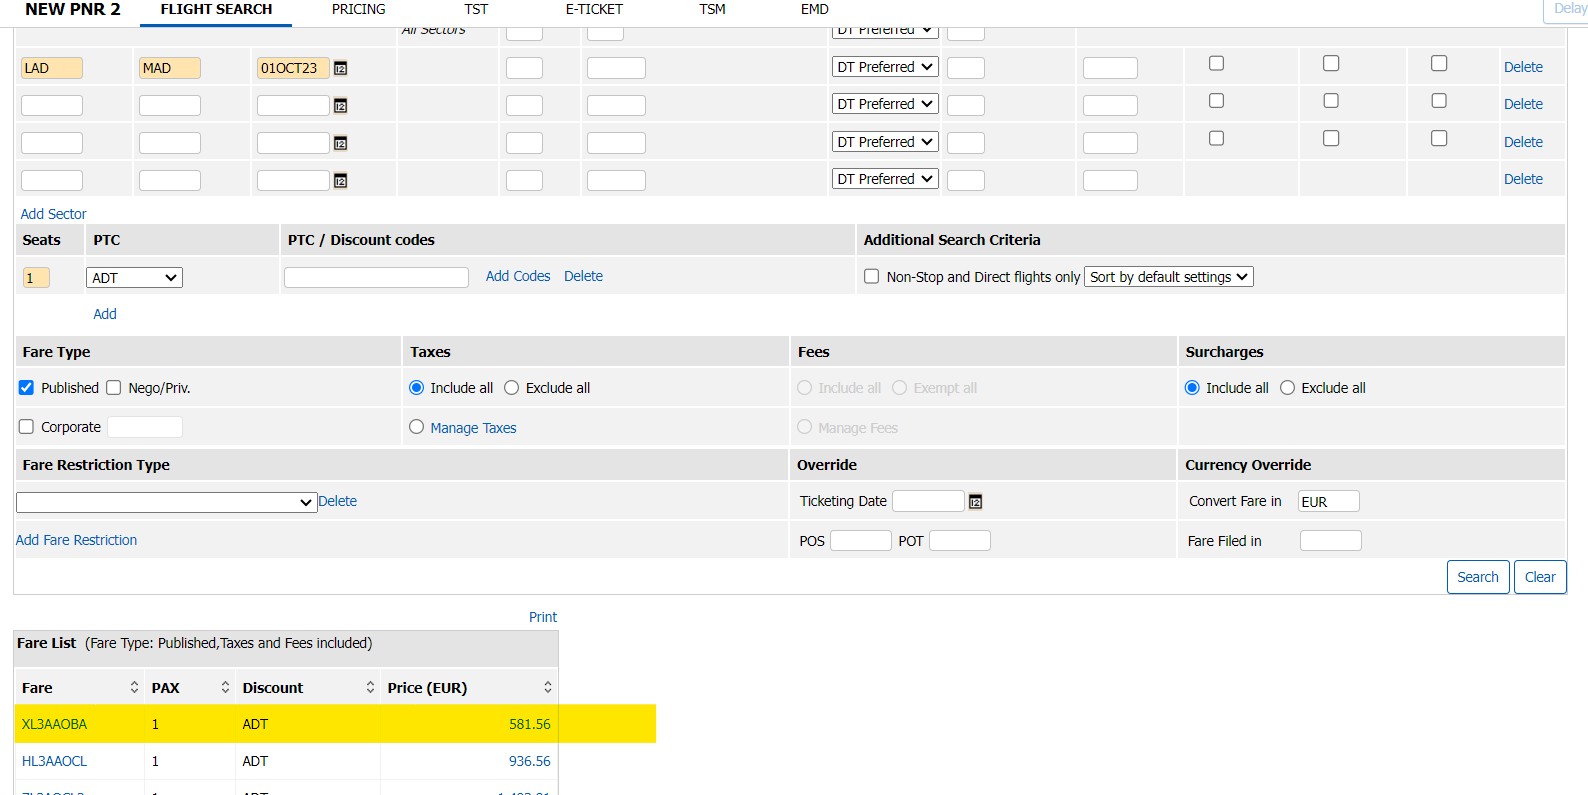

In [19]:
# Convert the flattened data into a Pandas DataFrame
df = pd.DataFrame(flat_data)

# Specify the output Excel file name
output_excel_file = 'flight_data_output.xlsx'

# Write the DataFrame to an Excel file
df.to_excel(output_excel_file, index=False, engine='openpyxl')

print(f"Data has been successfully written to '{output_excel_file}' Excel file.")

Data has been successfully written to 'flight_data_output.xlsx' Excel file.


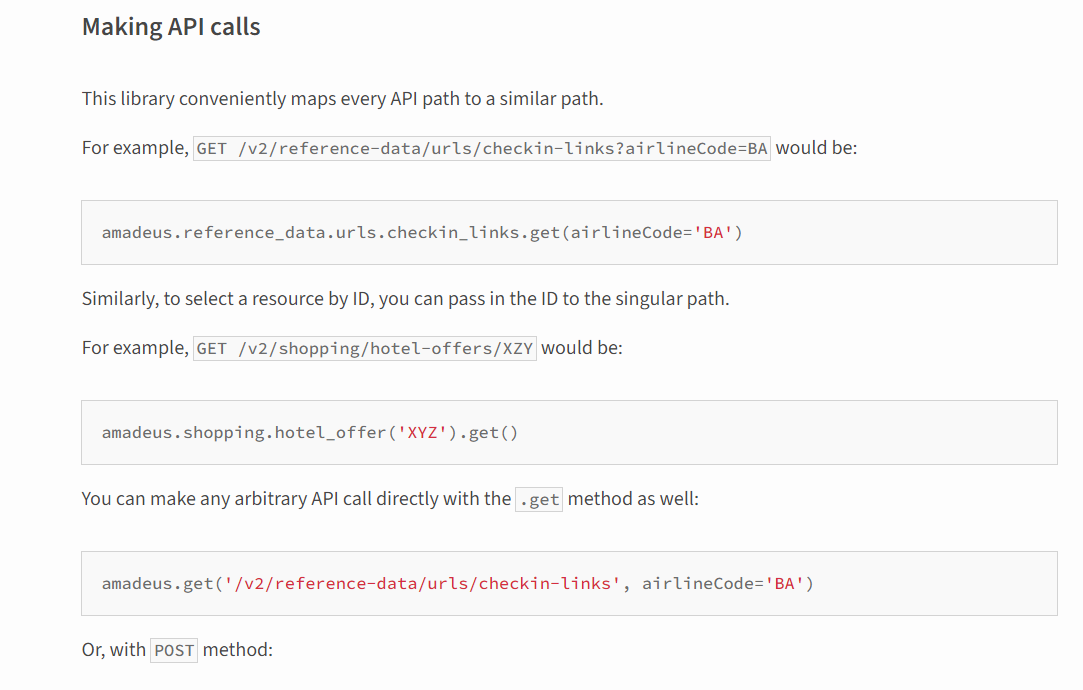

In [23]:
# This code gives me the schedule 

# Carrier = ['DT', 'TP', 'AT']
# flightNumber = 0  # Initialize flightNumber before the loop
# for i in range(1, 1001):  # Using range(1, 1001) to iterate from 1 to 1000
#     flightNumber += i

    
# departure_dates = ['2023-08-30', '2023-08-29', '2023-08-28']
# for dep in departure_dates:
#     for carrier in Carrier:
#         for FN in range(1,1001):


f = amadeus.schedule.flights.get(carrierCode='DT',flightNumber='653',scheduledDepartureDate= '2023-09-23')

print(f.data)

                                 
                                 
                                 

[{'type': 'DatedFlight', 'scheduledDepartureDate': '2023-09-23', 'flightDesignator': {'carrierCode': 'DT', 'flightNumber': 653}, 'flightPoints': [{'iataCode': 'LIS', 'departure': {'timings': [{'qualifier': 'STD', 'value': '2023-09-23T23:00+01:00'}]}}, {'iataCode': 'LAD', 'arrival': {'timings': [{'qualifier': 'STA', 'value': '2023-09-24T06:30+01:00'}]}}], 'segments': [{'boardPointIataCode': 'LIS', 'offPointIataCode': 'LAD', 'scheduledSegmentDuration': 'PT7H30M'}], 'legs': [{'boardPointIataCode': 'LIS', 'offPointIataCode': 'LAD', 'aircraftEquipment': {'aircraftType': '330'}, 'scheduledLegDuration': 'PT7H30M'}]}]


In [24]:
rows = []
for item in f.data:
    departure_timings = item['flightPoints'][0]['departure']['timings'][0]['value']
    arrival_timings = item['flightPoints'][1]['arrival']['timings'][0]['value']
    
    row = {
        'Type': item['type'],
        'ScheduledDepartureDate': item['scheduledDepartureDate'],
        'CarrierCode': item['flightDesignator']['carrierCode'],
        'FlightNumber': item['flightDesignator']['flightNumber'],
        'BoardPointIataCode': item['segments'][0]['boardPointIataCode'],
        'OffPointIataCode': item['segments'][0]['offPointIataCode'],
        'ScheduledSegmentDuration': item['segments'][0]['scheduledSegmentDuration'],
        'AircraftType': item['legs'][0]['aircraftEquipment']['aircraftType'],
        'ScheduledLegDuration': item['legs'][0]['scheduledLegDuration'],
        'DepartureTime': departure_timings,
        'ArrivalTime': arrival_timings
    }
    rows.append(row)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

# Display the DataFrame
df







,Type,ScheduledDepartureDate,CarrierCode,FlightNumber,BoardPointIataCode,OffPointIataCode,ScheduledSegmentDuration,AircraftType,ScheduledLegDuration,DepartureTime,ArrivalTime
0,DatedFlight,2023-09-23,DT,653,LIS,LAD,PT7H30M,330,PT7H30M,2023-09-23T23:00+01:00,2023-09-24T06:30+01:00
